# Time Spent on 2021 ML Zoomcamp

How much time did students take on submitting assignments and going through course work?
Walking through [Timur Kamaliev's](https://github.com/SVizor42) analysis of 2021 ml zoomcamp user data.
[cite](https://github.com/SVizor42/ML_Zoomcamp/blob/master/ml-zoomcamp-stats/ml-zoomcamp-stats.ipynb)

## Table of Contents

- Roles Data
- Time Spent Data
    - Assignments
    - Completed Assignments
    - Time Spent Preparation

## Roles Data

In [1]:
import pandas as pd

import os

In [2]:
DATA_DIR='../data'

In [3]:
roles_raw_df = pd.read_csv(os.path.join(DATA_DIR, 'roles_2021.csv'))

In [4]:
roles_raw_df.head()

,email,role
0,41451d46202653a266463966a11e1a240cc96182,Software Engineer
1,c6f7360d04141e533e8edf47b73673c0cd4689cd,Data Analyst
2,de6893cabfc89739a5e6172ea6d7c33f589cca98,Data Scientist
3,5ca1abf9445332b1bd4aab9738da5d7cfa46c692,Software Engineer
4,d36eb7deba1bc341ed7cd77158e6452ed6a19982,Student (STEM)


In [5]:
roles_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   416 non-null    object
 1   role    411 non-null    object
dtypes: object(2)
memory usage: 6.6+ KB


Observations:
- At least five roles are null.

Actions
- Fill null roles with 'Other'
- Plot Count of roles

In [6]:
roles_raw_df['role'].fillna('Other', inplace=True)

In [7]:
roles_df = roles_raw_df.groupby('role').count().rename(columns={'email': 'count'})
roles_df

,count
role,
Data Analyst,53
Data Engineer,16
Data Scientist,55
ML Engineer,14
Other,67
Software Engineer,67
Student (STEM),122
Student (not STEM),22


<AxesSubplot:ylabel='count'>

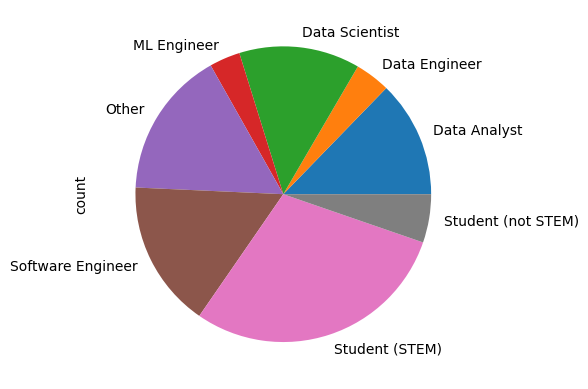

In [8]:
roles_df.plot.pie(y='count', legend=False)

Observations:
- Students make up about 1/3 of those taking the course
- Professionals about 1/2

## Time Spent Data

How much time did everyone take on the assignments?

In [9]:
time_spent_raw_df = pd.read_csv(os.path.join(DATA_DIR, 'time_spent_2021.csv'))

In [10]:
time_spent_raw_df.head(10)

,email,time_lectures,time_homework,what
0,926b1fa33743bbdb5c73cf4622febdfdb6a11126,3,1,homework-1
1,465b1103bcddd7eb0ea3b2240e31f3aa22a313ff,1,0.5,homework-1
2,f653bb70051c62cab513ebb400171e7a0de6e1e5,2,1,homework-1
3,510c636f6e171521b4221e3954299ae982311123,NaN,1,homework-1
4,9e8bf7837142da13f8ae36c6330da328bc88373a,<1 (playspeed: ~1.8 & skipped many familiar se...,<0.2,homework-1
5,9a9e4dd7d40d14acb3e05f01258c88923d343479,0.2 (skimmed the notes),10m,homework-1
6,5e7f189738624de0b7c96d6253a3c334195d9361,30 minutes,1.5 hours,homework-1
7,7145756e5c90c8f76bf5cc7657e803dbf2d5a85f,1,1,homework-1
8,1c2602a03ff83b16478b9ae81789f539902601ad,2.5,1.5,homework-1
9,c0ebe8c8c990a5f7945f2596d2e284d9e145af0b,~1h,~1h,homework-1


In [11]:
time_spent_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1899 entries, 0 to 1898
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email          1899 non-null   object
 1   time_lectures  1305 non-null   object
 2   time_homework  1620 non-null   object
 3   what           1899 non-null   object
dtypes: object(4)
memory usage: 59.5+ KB


Lots of null information.

In [12]:
time_spent_raw_df.describe()

,email,time_lectures,time_homework,what
count,1899,1305,1620,1899
unique,443,188,232,13
top,7ad144b35823cd48681c309a840902a77de85ec3,3,2,homework-1
freq,13,212,256,393


In [13]:
time_spent_raw_df.isna().sum()

email              0
time_lectures    594
time_homework    279
what               0
dtype: int64

Observations:
- More unique emails in homework than in roles (443 vs 416)
- time_lectures and time_homework
    - unvalidated inputs
    - significant amount of nulls
- 393 submissions for homework-1

Questions
- How many students completed each assignment('what')?

Actions
- Count submissions per assignment
- Plot number of submissions per assignment
-

### Assignments

How many students completed each assignment(‘what’)?

In [14]:
submissions_df = time_spent_raw_df['what'].value_counts().reset_index()\
    .rename(columns={'index':'assignment', 'what':'submissions'})
submissions_df

,assignment,submissions
0,homework-1,393
1,homework-2,243
2,homework-3,203
3,homework-4,173
4,homework-6,151
5,homework-5,145
6,midterm,123
7,midterm-evaluation,106
8,homework-8,90
9,homework-9,81


<AxesSubplot:xlabel='assignment'>

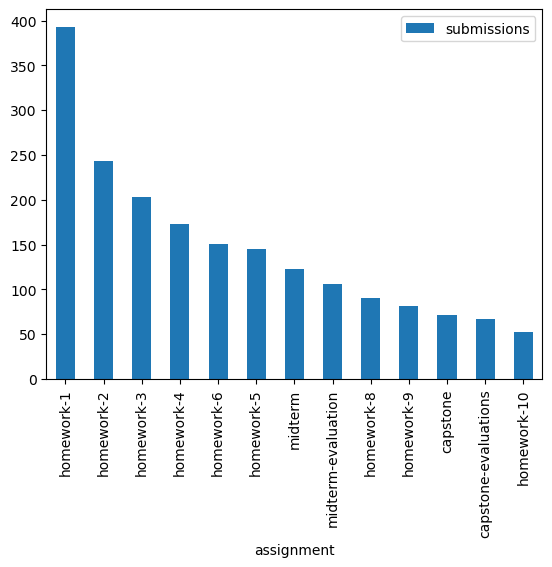

In [15]:
submissions_df.plot.bar(x='assignment', y='submissions')

Observations:
- Number of submissions generally decreased with each assignment
    - Assignment 6 had a slight increase from 5

### Completed Assignments

Can we plot the distribution of users according to the number of completed assignments?

In [16]:
users_submissions_df = time_spent_raw_df.groupby('email').count()['what'].value_counts()\
    .reset_index().sort_values(by='index')\
    .rename(columns={'index':'num_of_submissions', 'what':'num_of_users'})\
    .reset_index(drop=True)
users_submissions_df

,num_of_submissions,num_of_users
0,1,172
1,2,62
2,3,30
3,4,16
4,5,24
5,6,39
6,7,5
7,8,15
8,9,8
9,10,8


In [17]:
cumulative_sum = users_submissions_df.loc[::-1, 'num_of_users'].cumsum()[::-1]
cumulative_sum

0     443
1     271
2     209
3     179
4     163
5     139
6     100
7      95
8      80
9      72
10     64
11     50
12     34
Name: num_of_users, dtype: int64

In [18]:
users_submissions_df['at_least_num_of_users'] = cumulative_sum
users_submissions_df

,num_of_submissions,num_of_users,at_least_num_of_users
0,1,172,443
1,2,62,271
2,3,30,209
3,4,16,179
4,5,24,163
5,6,39,139
6,7,5,100
7,8,15,95
8,9,8,80
9,10,8,72


<AxesSubplot:xlabel='num_of_submissions'>

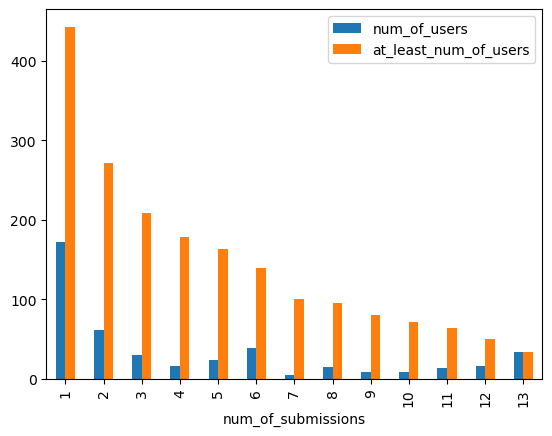

In [19]:
users_submissions_df.plot.bar(x='num_of_submissions', y=['num_of_users', 'at_least_num_of_users'])

Observations:
- 443 completed at least one assignment
- 34 completed all assignments
- Assignments 4, 7, 9, and 10 seem to have the least drop off

### Time Spent Preparation

Start working on aggregating the time spent on lectures, homeworks, and projects.

Create DataFrames for lectures, homeworks, and projects

In [20]:
projects_df = time_spent_raw_df[time_spent_raw_df.what.str.contains('midterm|capstone')]
projects_df.head()

,email,time_lectures,time_homework,what
1532,54e6b0a0b8febbb8310f4708f267139b08ff704f,NaN,8,midterm
1533,b919f652a3c883c772ff7beadc76dc7fdbabebc2,NaN,12,midterm
1534,1814c43391dd1efa3ebbd4a6edf694ff05f95946,NaN,12,midterm
1535,510c636f6e171521b4221e3954299ae982311123,NaN,15-20,midterm
1536,eeae56daf55b767d4a01ff5b82e812c0e91a8fe0,NaN,50,midterm


In [21]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 1532 to 1898
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email          367 non-null    object
 1   time_lectures  0 non-null      object
 2   time_homework  305 non-null    object
 3   what           367 non-null    object
dtypes: object(4)
memory usage: 14.3+ KB


Lectures don't make sense for these so we can drop it. They are all null anyway.

In [22]:
projects_df = projects_df.drop(columns={'time_lectures'})

In [23]:
projects_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 1532 to 1898
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email          367 non-null    object
 1   time_homework  305 non-null    object
 2   what           367 non-null    object
dtypes: object(3)
memory usage: 11.5+ KB


In [24]:
hwk_lct_df = time_spent_raw_df.drop(projects_df.index)

In [25]:
hwk_lct_df.sample(10)

,email,time_lectures,time_homework,what
899,67599cccc09d502e2a8bcdbdc5e48ec24516cd43,2,2,homework-4
1464,866873bee2e459b549eedd1ec6b902b2483d6066,NaN,NaN,homework-9
120,7dbf70a48f982d01074b5587f5e1a5f402797b15,NaN,NaN,homework-1
1410,ad078a77fe56e09957b51a828142d4719b292d67,3 hours,3 hours,homework-8
1517,582796c4a2f39c5bf8a45b2b491de255a94f184c,NaN,NaN,homework-9
384,8db28b8a349d586732e9b93d554c649b21171f2d,2,1,homework-1
333,e3205b81d27360e8f8f5e36a0e3bd0830aaba93e,8,3,homework-1
900,4fbf26f1e8ac39d6bce028e30da782a5a10d40dd,2,3,homework-4
239,8585c740b5b881aba4e37683b60388f13a6d4f6d,2,1,homework-1
231,ce839bcc2c11ccee5ec9226defa6474eacfc8615,3,1,homework-1


In [26]:
hwk_lct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1532 entries, 0 to 1531
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email          1532 non-null   object
 1   time_lectures  1305 non-null   object
 2   time_homework  1315 non-null   object
 3   what           1532 non-null   object
dtypes: object(4)
memory usage: 48.0+ KB


In [27]:
hwk_lct_df.shape

(1532, 4)

### Lectures

In [28]:
lecture_count_df = hwk_lct_df['time_lectures'].value_counts().reset_index()\
    .rename(columns={'index':'time_spent', 'time_lectures':'count'})

In [29]:
lecture_count_df.shape

(188, 2)

In [30]:
lecture_count_df.head(20)

,time_spent,count
0,3,212
1,2,171
2,4,154
3,5,126
4,6,86
5,1,65
6,8,64
7,10,41
8,7,22
9,2 hours,21


In [31]:
lecture_count_df.tail(20)

,time_spent,count
168,About 3 hours,1
169,roughly 4 hours,1
170,16,1
171,2-3 days (See on comments section),1
172,about 1h a day,1
173,"not really had much time last week, just check...",1
174,"Came into this very late, so not minutes of pe...",1
175,Still need to watch and read! catching up this...,1
176,4.33,1
177,10hrs,1


Observations:
- 175 unique inputs
- 3 is the most common answer
- The top 9 responses can easily be converted to integers
- The top 10 already has a data input containing words/text (2 hours)
- The top 20 can be parsed after removing spaces and the text 'hours'

Actions:
- May or may not parse 'hours' text to validate data
- Fields containing text that can't be parsed will be coerced into NaN

### Time Spent on Lectures

Let's look at the time it takes students to study the lectures.

In [32]:
lecture_time_df = pd.DataFrame()
lecture_time_df['email'] = hwk_lct_df.email
lecture_time_df['assignment'] = hwk_lct_df.what
lecture_time_df['original_time'] = hwk_lct_df.time_lectures
lecture_time_df['processed_time'] = pd.to_numeric(hwk_lct_df.time_lectures, errors='coerce')

lecture_time_df.head()

,email,assignment,original_time,processed_time
0,926b1fa33743bbdb5c73cf4622febdfdb6a11126,homework-1,3,3.0
1,465b1103bcddd7eb0ea3b2240e31f3aa22a313ff,homework-1,1,1.0
2,f653bb70051c62cab513ebb400171e7a0de6e1e5,homework-1,2,2.0
3,510c636f6e171521b4221e3954299ae982311123,homework-1,NaN,NaN
4,9e8bf7837142da13f8ae36c6330da328bc88373a,homework-1,<1 (playspeed: ~1.8 & skipped many familiar se...,NaN


In [33]:
clean_lecture_count_df = lecture_time_df.processed_time.value_counts().reset_index()\
    .rename(columns={'index':'hours', 'processed_time':'count'})

clean_lecture_count_df.head(20)

,hours,count
0,3.0,212
1,2.0,171
2,4.0,154
3,5.0,126
4,6.0,86
5,1.0,65
6,8.0,64
7,10.0,41
8,7.0,22
9,12.0,16


In [34]:
clean_lecture_count_df.shape

(38, 2)

In [35]:
clean_lecture_count_df.sum()

hours     649.48
count    1059.00
dtype: float64

Observations:
- only 38 unique inputs now
- still have 1059 data points

Actions:
- Let us try plotting them

#### Look at processed data

In [36]:
lecture_time_df.processed_time.describe()

count    1059.000000
mean        5.064051
std         8.413630
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       220.000000
Name: processed_time, dtype: float64

array([[<AxesSubplot:title={'center':'processed_time'}>]], dtype=object)

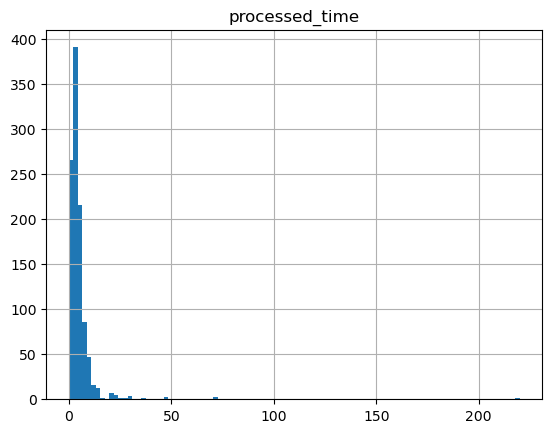

In [37]:
lecture_time_df.hist(column='processed_time', bins=100)

Observations:
- The max (220) seems like way too big of an outlier.

Actions:
- Trim the top end data to just 4 standard deviations.

In [38]:
lecture_time_s = lecture_time_df.processed_time.rename('time')
mean = lecture_time_s.mean()
std = lecture_time_s.std()

mean, std

(5.064050991501415, 8.413629870657621)

In [39]:
lecture_time_4_std = lecture_time_s[(lecture_time_s - mean) <= 4*std]
lecture_time_4_std.describe()

count    1054.000000
mean        4.651641
std         3.882214
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        36.000000
Name: time, dtype: float64

<AxesSubplot:>

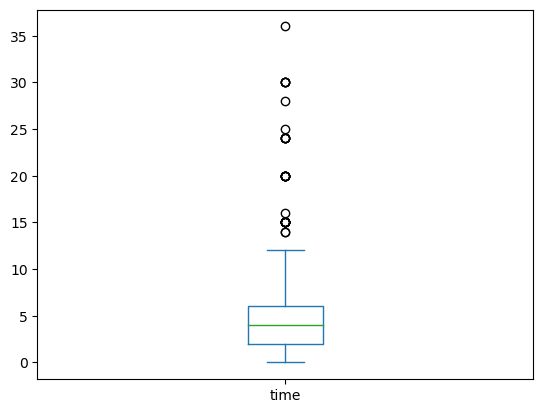

In [40]:
lecture_time_4_std.plot.box()

In [41]:
mean = lecture_time_4_std.mean()
std = lecture_time_4_std.std()

(mean, mean+std, mean+2*std, mean+3*std)

(4.651641366223909, 8.533855058604948, 12.416068750985986, 16.298282443367025)

Observations:
- Users spent an average of 4.6 hours on the lectures
- There is a large deviation in Users time spent on lectures ( almost 4 hours)
- our max is now 36 hours (more reasonable)
- 50% - <= 4.6 hours
- 84% - <= 8.5 hours
- 97.7% - <= 12.4 hours
- 99.8% - <= 16.3 hours

### Homework


In [42]:
homework_count_df = hwk_lct_df['time_homework'].value_counts().reset_index()\
    .rename(columns={'index':'time_spent', 'time_homework':'count'})

In [43]:
homework_count_df.shape

(165, 2)

In [44]:
homework_count_df.head(20)

,time_spent,count
0,2,240
1,3,201
2,1,190
3,4,115
4,5,78
5,1.5,50
6,6,42
7,0.5,29
8,2 hours,29
9,8,23


In [45]:
homework_count_df.tail()

,time_spent,count
160,3-4 hours,1
161,1hr30mins,1
162,Approx. 2 hours,1
163,2 hours,1
164,45 mins,1


Observations:
- 165 unique inputs
- the count drops faster in the top 20
- Most of the top 20 can be parsed without dealing with text

### Time Spent on Homework

Let's look at the time students spent completing homework assignments.

In [46]:
homework_time_df = pd.DataFrame()
homework_time_df['email'] = hwk_lct_df.email
homework_time_df['assignment'] = hwk_lct_df.what
homework_time_df['original_time'] = hwk_lct_df.time_homework
homework_time_df['processed_time'] = pd.to_numeric(hwk_lct_df.time_homework, errors='coerce')

homework_time_df.head()

,email,assignment,original_time,processed_time
0,926b1fa33743bbdb5c73cf4622febdfdb6a11126,homework-1,1,1.0
1,465b1103bcddd7eb0ea3b2240e31f3aa22a313ff,homework-1,0.5,0.5
2,f653bb70051c62cab513ebb400171e7a0de6e1e5,homework-1,1,1.0
3,510c636f6e171521b4221e3954299ae982311123,homework-1,1,1.0
4,9e8bf7837142da13f8ae36c6330da328bc88373a,homework-1,<0.2,NaN


In [47]:
clean_homework_count_df = homework_time_df.processed_time.value_counts().reset_index()\
    .rename(columns={'index':'hours', 'processed_time':'count'})

clean_homework_count_df

,hours,count
0,2.00,240
1,3.00,201
2,1.00,190
3,4.00,115
4,5.00,78
5,1.50,50
6,6.00,42
7,0.50,29
8,8.00,23
9,2.50,21


In [48]:
clean_homework_count_df.shape

(39, 2)

In [49]:
clean_homework_count_df.sum()

hours     348.53
count    1076.00
dtype: float64

Observations:
- 39 unique inputs
- 1079 data points

#### Look at processed homework time data

In [50]:
homework_time_df.processed_time.describe()

count    1076.00000
mean        3.32066
std         3.47733
min         0.00000
25%         1.50000
50%         2.50000
75%         4.00000
max        48.00000
Name: processed_time, dtype: float64

array([[<AxesSubplot:title={'center':'processed_time'}>]], dtype=object)

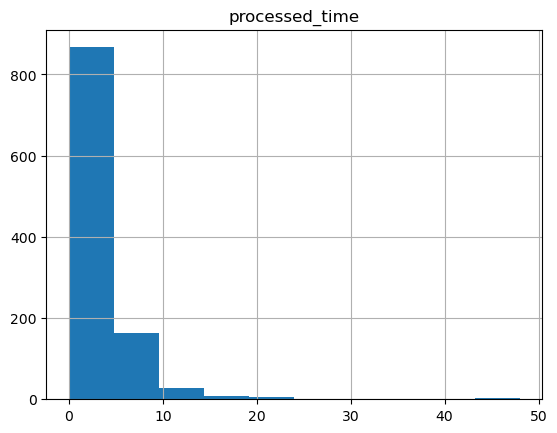

In [51]:
homework_time_df.hist(column='processed_time')

Observations:
- data already looks a lot better than the lecture time data
- Seems like students spent less time on homeworks than lectures

Actions:
- trim to 4 std, for consistency

In [52]:
homework_time_s = homework_time_df.processed_time.rename('time')
mean = homework_time_s.mean()
std = homework_time_s.std()

mean, std

(3.320659851301115, 3.4773301214428174)

In [53]:
homework_time_s = homework_time_s[(homework_time_s - mean) <= 4*std]

homework_time_s.describe()

count    1066.000000
mean        3.095713
std         2.400036
min         0.000000
25%         1.500000
50%         2.500000
75%         4.000000
max        17.000000
Name: time, dtype: float64

<AxesSubplot:>

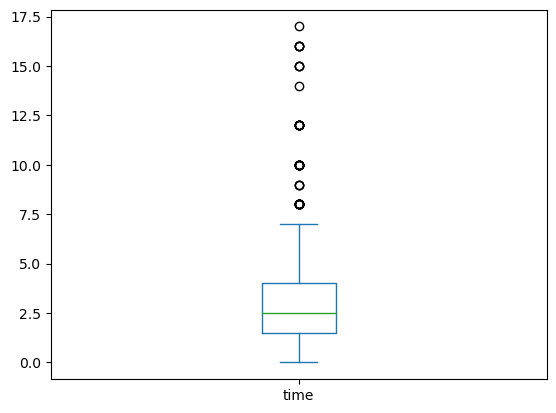

In [54]:
homework_time_s.plot.box()

In [55]:
mean = homework_time_s.mean()
std = homework_time_s.std()

mean, mean+std, mean+2*std, mean+3*std

(3.095712945590994, 5.495748803727154, 7.895784661863313, 10.295820519999474)

Observations:
- Users spent an average of 3.1 hours on the homework
- The deviation is still large (2.5 hours) relative to the mean
- max is 17 hours
- 50% - <= 3.1 hours
- 84% - <= 5.5 hours
- 97.7% - <= 7.9 hours
- 99.8% - <= 10.3 hours

Students spent less time on homework than they did on lectures.

## Conclusions

Expect to take 7.7+ hours on lectures and homework each week.

| percentile (%) | lecture time (h) | homework time (h) | total time (h) |
|:--------------:|:----------------:|:-----------------:|:--------------:|
|       50       |       4.6        |        3.1        |      7.7       |
|       84       |       8.5        |        5.5        |       14       |
|      97.7      |       12.4       |        7.9        |      20.3      |
|      99.8      |       16.3       |       10.3        |      26.6      |
